In [1]:
import numpy as np
from journal import *

In [10]:
# Given data
diameter = 100e-3  # Diameter of the bearing in meters
length = 30e-3     # Length of the bearing in meters
load = 525         # Static load in Newtons
clearance = 0.1e-3  # Radial clearance in meters
viscosity = 0.1    # Viscosity of the oil in Pa.s
speed_rpm = 1500   # Rotational speed in revolutions per minute

# Convert speed to rad/s
speed_rad_s = (2 * np.pi * speed_rpm) / 60


In [28]:
eps, Ss, S = compute_eps(diameter, length, load, clearance, viscosity,speed_rpm)
print("epsilon: ", eps)

epsilon:  0.26629750900547655


In [13]:
# Friswell equations
Ke, Ce = compute_ke_ce(eps, load / clearance, Omega=speed_rpm * 2 * np.pi / 60)
print("Stiffness matrix (Ke) [MN/m]:")
print(Ke / 1e6)  # Convert to MN/m

print("\nDamping matrix (Ce) [kNs/m]:")
print(Ce / 1e3)  # Convert to kNs/m

Stiffness matrix (Ke) [MN/m]:
[[ 12.80795958  16.39359325]
 [-25.06039328   8.81530274]]

Damping matrix (Ce) [kNs/m]:
[[232.89692987 -81.92437052]
 [-81.92437052 294.91161944]]


In [27]:
# Al-Bender equations
nu = speed_rad_s
pa = 1010325
Lambda = np.array([compute_squeeze_number(viscosity,nu, pa, diameter/2, clearance)])
sigma = np.array([compute_squeeze_number(viscosity,nu,pa,diameter/2,clearance)])

LoverD = length / diameter

Kxx, Kxy = stiffness_Kxx_Kxy(Lambda,sigma,LoverD)
Cxx, Cxy = damping_Cxx_Cxy(Lambda,sigma,LoverD)

Kxx = Kxx[0]
Kxy = Kxy[0]
Cxx = Cxx[0]
Cxy = Cxy[0]

K_scale = pa * length * diameter / clearance
C_scale = 3 * viscosity * length / (clearance / diameter)**3

Ke = np.array([
    [Kxx,Kxy],
    [-Kxy,Kxx]
]) * K_scale

Ce = np.array([
    [Cxx,Cxy],
    [-Cxy,Cxx]
]) * C_scale

print("Stiffness matrix (Ke) [MN/m]:")
print(Ke / 1e6)  # Convert to MN/m

print("\nDamping matrix (Ce) [kNs/m]:")
print(Ce / 1e3)  # Convert to kNs/m

Stiffness matrix (Ke) [MN/m]:
[[17.94013968 -6.23659052]
 [ 6.23659052 17.94013968]]

Damping matrix (Ce) [kNs/m]:
[[  39.70336834 -114.21047641]
 [ 114.21047641   39.70336834]]


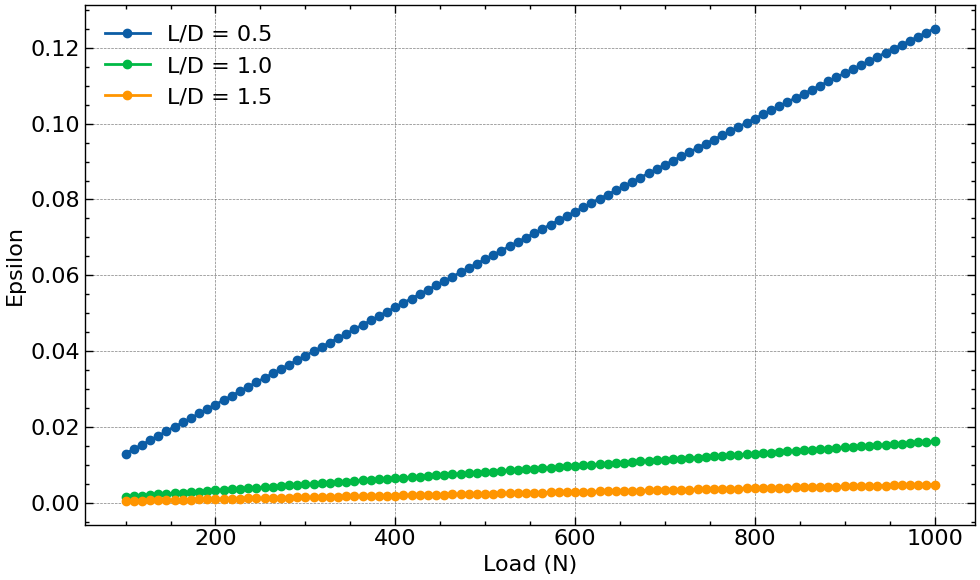

In [ ]:
import matplotlib.pyplot as plt
# Calculate epsilon for different loads and L/D ratios and plot the results
L_D_ratios = [0.3, 0.5, 1.0]  # Different L/D ratios
loads = np.linspace(100, 1000, 100)  # Loads from 100 N to 1000 N

plt.figure(figsize=(10, 6))

for L_D in L_D_ratios:
    length = L_D * diameter  # Update length based on L/D ratio
    epsilons = []
    for load in loads:
        eps, _, _ = compute_eps(diameter, length, load, clearance, viscosity, speed_rpm)
        epsilons.append(eps)
    plt.plot(loads, epsilons, marker='o', label=f'L/D = {L_D}')

# Plot epsilon vs load for different L/D ratios
plt.xlabel('Load (N)')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('epsilon_vs_load_LD.png', dpi=300)
plt.show()